## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 순차 데이터 </span>
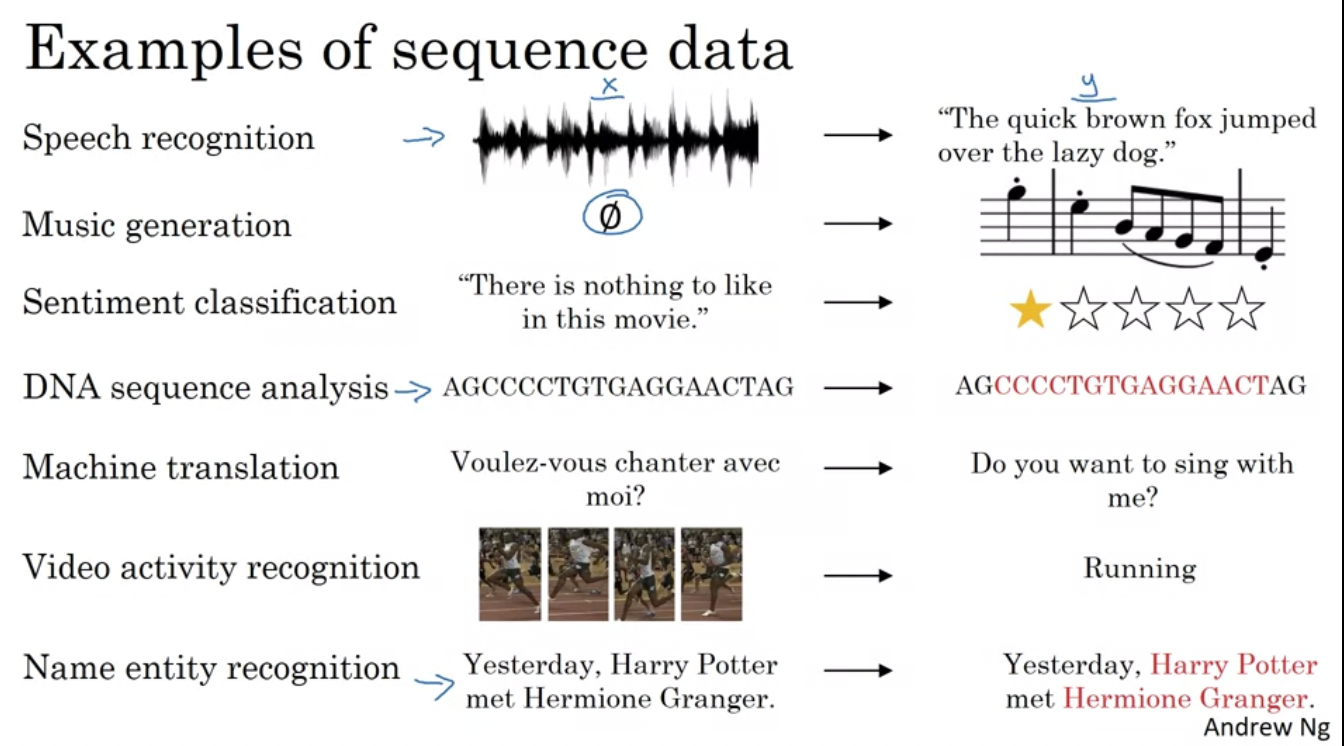
> 순서에 의미가 있어 순서가 달라질 경우 의미가 손상되는 데이터

### <span style="background-color:#FFFFE0; color:#CD5C5C; padding:4px; border-radius:5px;"> 특징</span>

`요소의 순서 의존성` 데이터 구성 요소 순서 자체가 핵심 정보

`자기 상관성` 이전 시점의 데이터가 다음 시점의 데이터에 영향

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> RNN </span>
> 순환 구조의 순차 데이터 처리에 특화된 인공 신경망

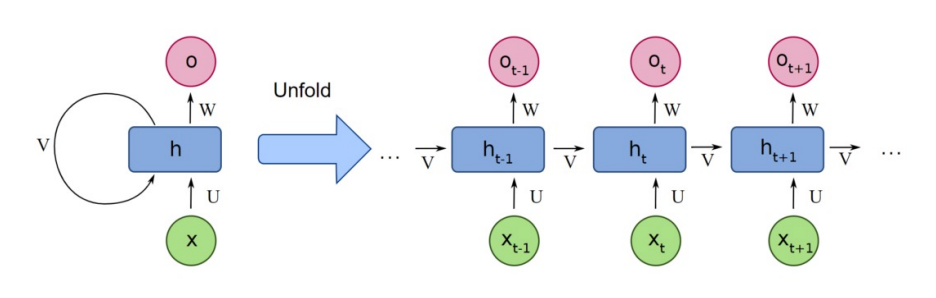

1. 시퀀스 데이터를 입력받아 순서 정보를 유지하며 처리
2. 순환하는 은닉층이 매 시점의 은닉 상태를 업데이트
3. 이전 시점의 값을 현 시점으로 넘겨 줌

### <span style="background-color:#FFFFE0; color:#CD5C5C; padding:4px; border-radius:5px;"> 가중치 공유</span>
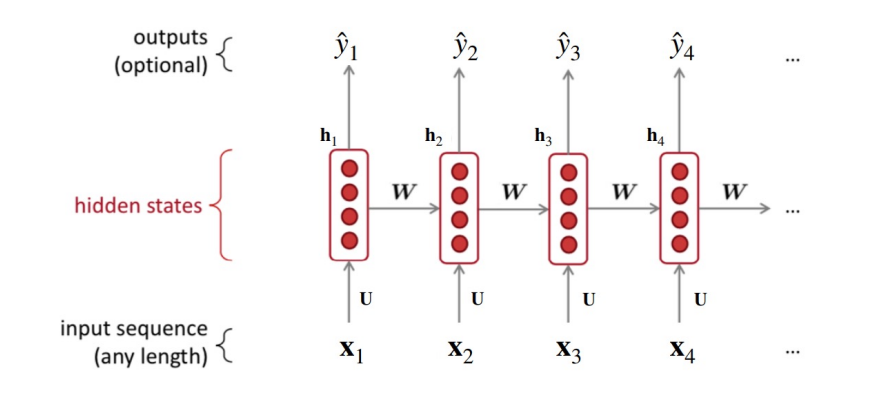
> 동일한 가중치(동일한 파라미터 공유: 입력 가중치, 순환 가중치, 편향)를 시퀀스의 다양한 시점에서 반복적으로 적용

-> RNN이 시퀀스 데이터의 길이와 시점 위치에 상관없이 효과적으로 작동하게 함

##### <span style="background-color:#DCDCDC; color:#000000; padding:4px; border-radius:5px;"> 장점 </span>
`학습 파라미터 수 감소` 일정하게 유지 -> 모델을 빠르고 가볍게!

`일반화 능력 향상` -> 새로운 길이나 패턴에도 유연하게 대응 가능!

### <span style="background-color:#FFFFE0; color:#CD5C5C; padding:4px; border-radius:5px;"> 장기 의존성 문제</span>
> 시퀀스 앞 부분의 중요 정보 잊어버려 맥락 파악 능력이 급격히 저하되는 현상

**Why...**: 전체 시퀀스를 모두 읽은 후 역전파가 이루어짐 -> chain rule 때문에 미분값을 반복적으로 곱함
##### <span style="background-color:#DCDCDC; color:#000000; padding:4px; border-radius:5px;"> 기울기 소실 </span>
> 시퀀스 뒤쪽의 오차가 앞쪽까지 제대로 전달되지 x -> 먼 과거의 정보를 학습하지 못함... (기울기 0으로 수렴)

##### <span style="background-color:#DCDCDC; color:#000000; padding:4px; border-radius:5px;"> 기울기 폭주 </span>
> 시퀀스 뒤쪽의 오차가 역전파 과정에서 비정상적으로 커짐 (기울기 무한대로 발산))

##### <span style="background-color:#DCDCDC; color:#000000; padding:4px; border-radius:5px;"> 느린 훈련 시간 </span>
> 계산 과정이 순차적이기 때문에 느림...


## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> LSTM </span>
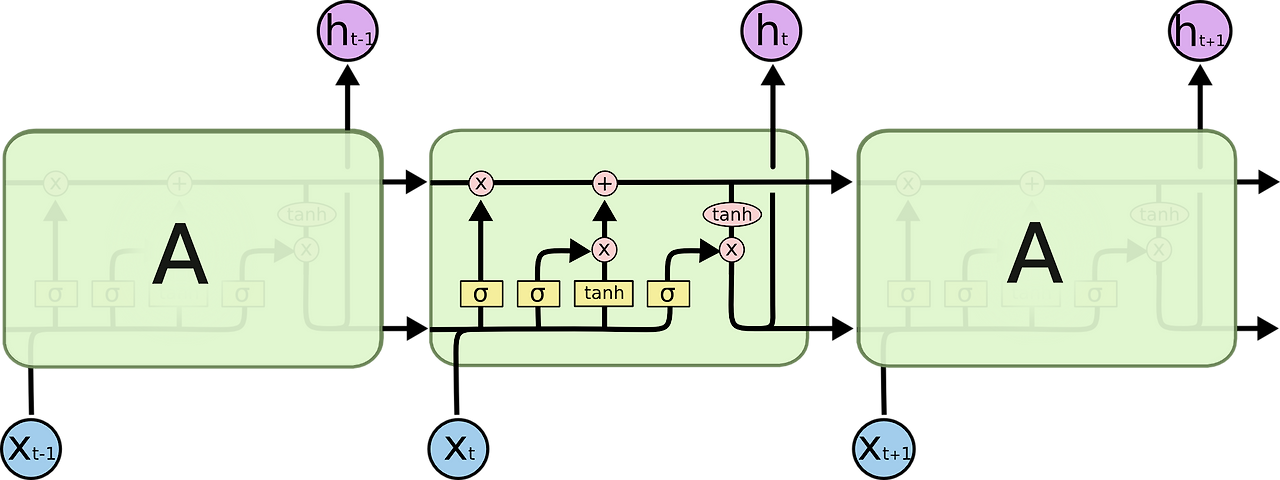
> 기억할 내용과 잊어버릴 내용을 선택해서, 중요한 정보들을 오래 가져감 -> 기울기 소실 문제 완화!

##### <span style="background-color:#DCDCDC; color:#000000; padding:4px; border-radius:5px;"> 순환층 </span>
- $c_t$: 장기 기억
- $h_t$: 단기 기억

##### <span style="background-color:#DCDCDC; color:#000000; padding:4px; border-radius:5px;">Gate </span>
- `Forget gate` 정보를 얼마나 잊어버릴지 결정
- `Input gate` 현재 정보를 얼마나 사용할지 결정
- `Output gate` 다음 층으로 어떤 정보를 전달할지 결정

> Final memory cell: gate를 결합해 현재 정보를 얼마나 기억할지 계산


## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> GRU </span>
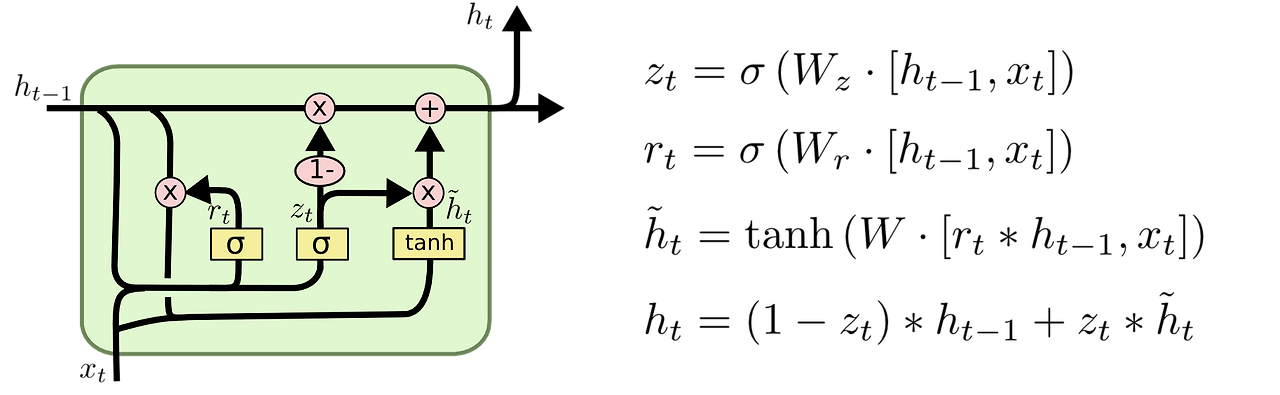
> LSTM에서 조금 더 발전한 것으로, 별도의 메모리 셀 없이 게이트 수를 줄여 구조 간소화

- `update gate` = Forget gate + input gate
- `reset gate`

-> Gate 개수 두 개로 줄어 학습 시간 줄어듦

||LSTM|GRU|
|-----|----------|----------|
|구조|3개 게이트(입,삭,출)|2개 게이트(업데이트, 리셋)|
|복잡도|더 복잡, 파라미터 多|단순, 파라미터 少|
|학습 속도|느림 (계산량 多)|빠름 (계산량 少)|
|메모리 사용량|큼|작음|
|장기 의존성 처리|강력|다소 약함|
|연구 및 사례 축적|매우 많음|최근 등장으로 다소 적음|
|성능|데이터가 충분하고 문제 복잡성 높을 때 강력|데이터가 적거나 효율성 중요할 때 강력|
|사용|긴 시퀀스에서 문맥 이해가 중요할 때|실시간 예측이 필요할 때|
|예시|기계 번역, 언어 모델링, 장기 시계열 예측|음성 인식, 스트리밍 데이터 등|

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> Seq2Seq </span>
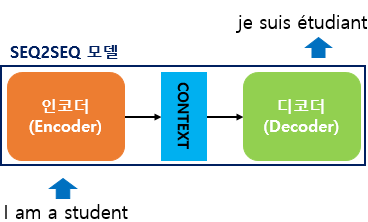

> 한 시퀀스를 다른 시컨스로 변환하는 작업을 수행

- 단어의 입력 개수와 출력 개수가 동일하지 않아도 됨
- 인코더-디코더 모듈 보유: RNN 혹은 LSTM으로 구성

##### <span style="background-color:#DCDCDC; color:#000000; padding:4px; border-radius:5px;"> 인코더 </span>
> 입력된 시퀀스를 읽고 압축하여 디코더에게 넘겨 줄 문맥 정보(Context Vector) 준비

```
t-1 시점의 은닉 상태 => | 인코더 | => t 시점의 은닉 상태
```

##### <span style="background-color:#DCDCDC; color:#000000; padding:4px; border-radius:5px;"> 디코더 </span>
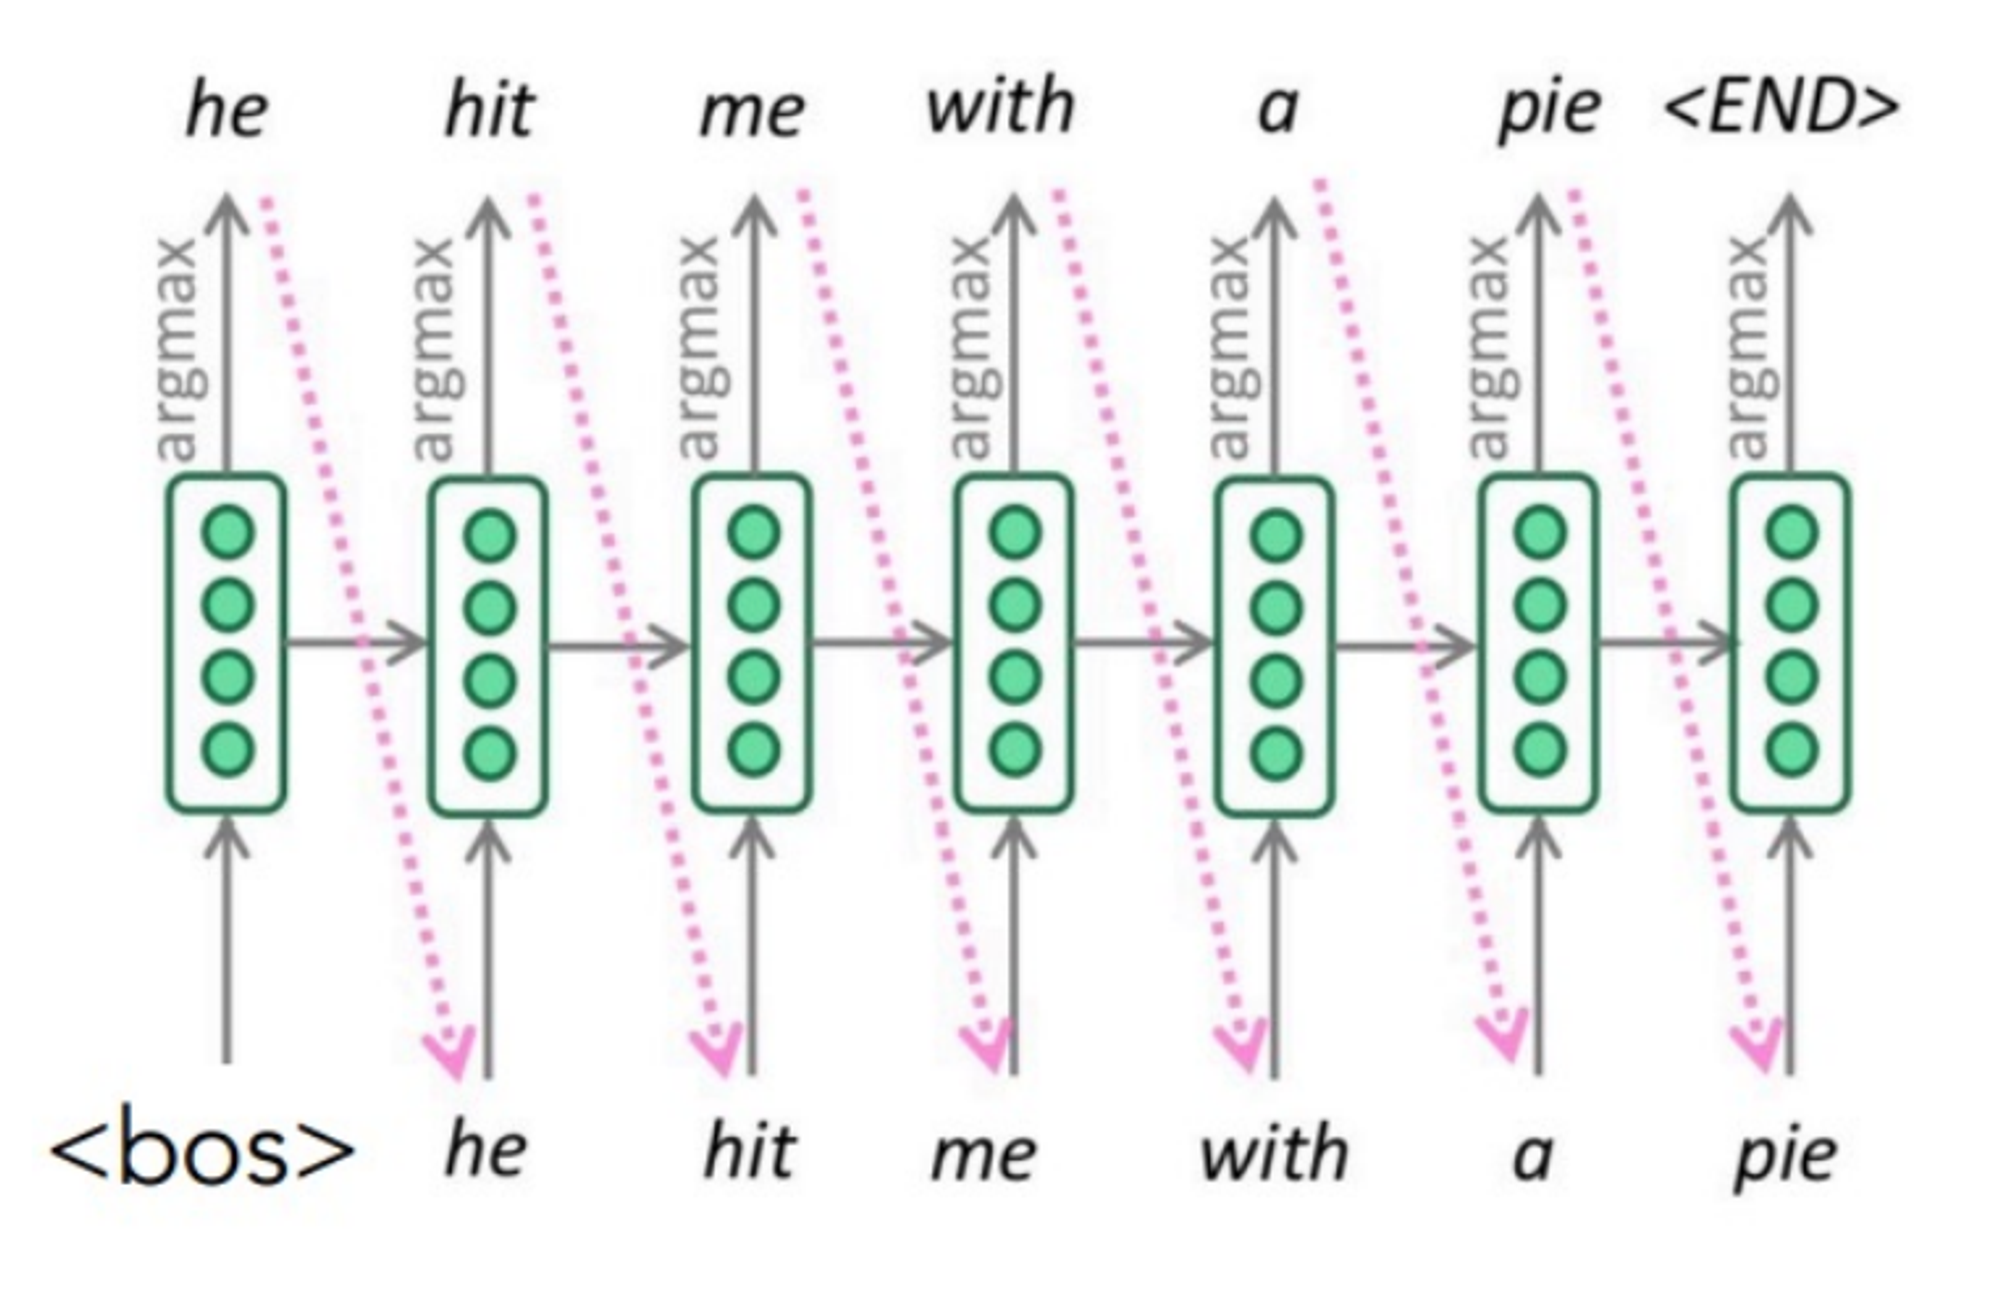
> 압축된 정보 바탕으로 원하는 시퀀스 생성

```
인코더가 보내 준 Context Vector=디코더의 첫 번째 은닉 상태
```

### <span style="background-color:#FFFFE0; color:#CD5C5C; padding:4px; border-radius:5px;"> 병목 현상</span>
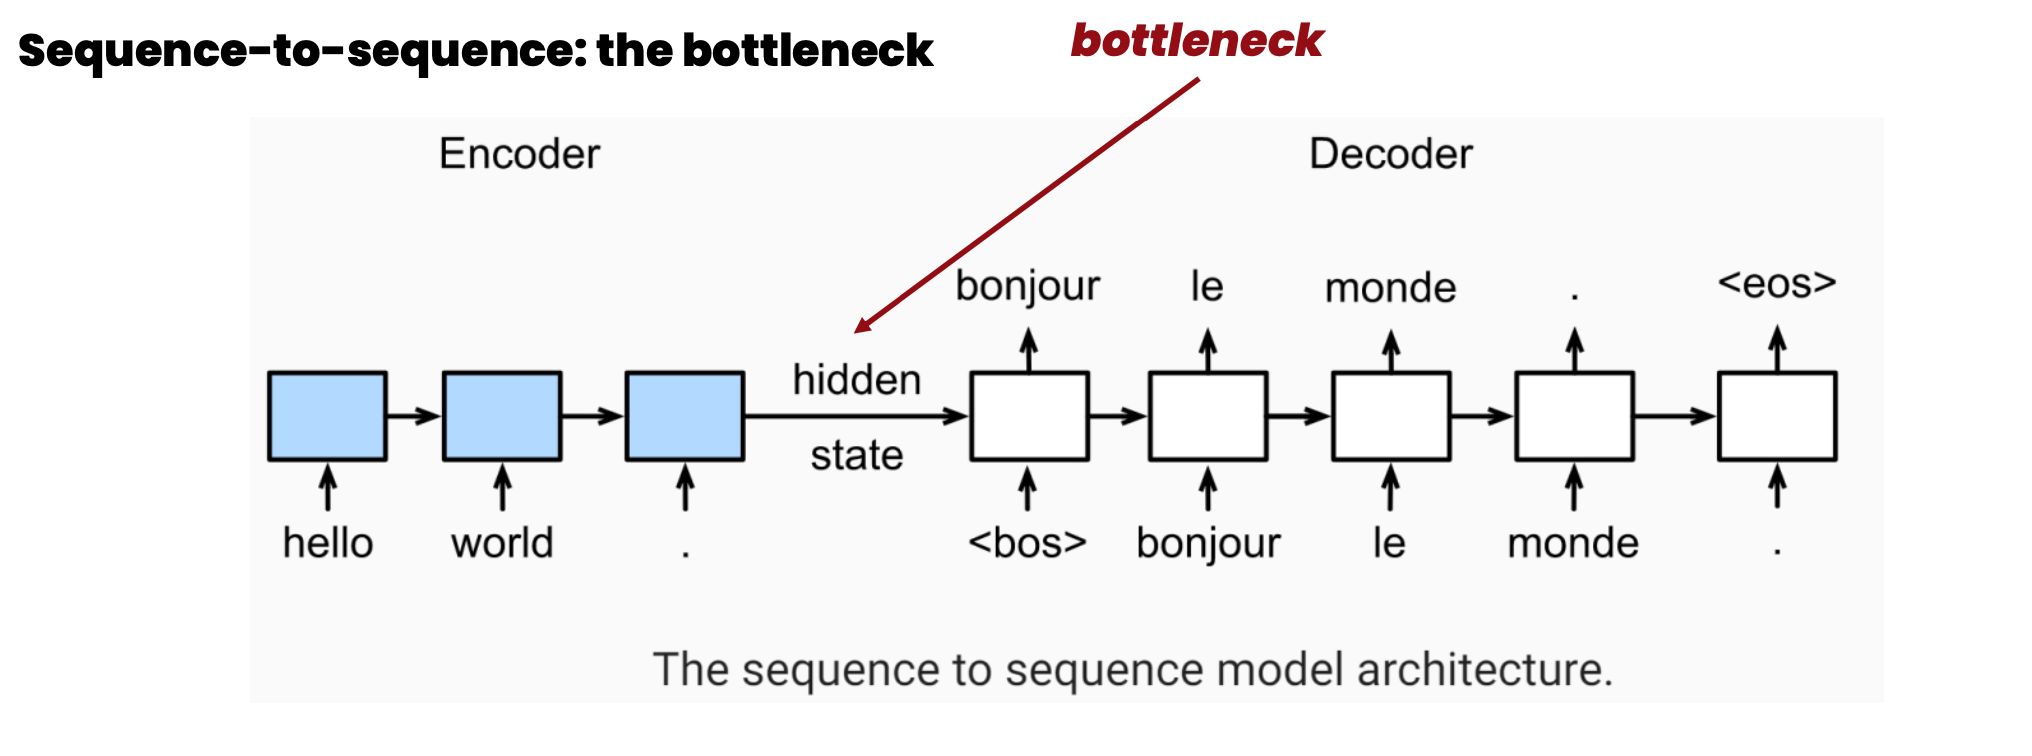

길이가 다른 두 문장을 고정된 Context Vector에 정보 압축 -> 병목 현상 발생!

- 정보 손실
- 모델 성능 하락